In [85]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# For Color Normalization Alone

In [117]:
input_dir = '../data/histology_raw/'
input_image_list = os.listdir(input_dir)

#output_dir = "output_images/"
output_dir = '../data/histology_color_normalized/'

### Create function to calculate the mean and standard deviation

In [118]:
def get_mean_and_std(x):
	x_mean, x_std = cv2.meanStdDev(x)
	x_mean = np.hstack(np.around(x_mean,2))
	x_std = np.hstack(np.around(x_std,2))
	return x_mean, x_std

### Select an image to use as your "template image", convert it to LAB space, and calculate the mean and std

This image is used as a template for the rest of the images. Later we will use the information from this image to match the other images.
We will use histology_1 for this, but try histology_2 as well to see how different templates work

In [119]:
template_img_raw = cv2.imread('../data/histology_raw/histology_1.png')
template_img_LAB = cv2.cvtColor(template_img_raw,cv2.COLOR_BGR2LAB)

template_mean, template_std = get_mean_and_std(template_img_LAB) 

In [120]:
# Create a figure to hold the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) # figsize can be adjusted as needed

# Display the first image in the first subplot
ax1.imshow(template_img_raw)
ax1.set_title(str("Raw Image"))
ax1.axis('off')  # Hide the axis

# Display the second image in the second subplot
ax2.imshow(template_img_LAB)
ax2.set_title('LAB Image')
ax2.axis('off')  # Hide the axis

# Show the plot
plt.show()

### Convert all of the images into lab space and match to the chosen template

The code snippet provided is an example of an image processing operation being performed on an image `input_img` using Python. Let's break down what the code is doing step by step:

1. `height, width, channel = input_img.shape`: This line is unpacking the shape of `input_img` into three variables: `height`, `width`, and `channel`. The shape is expected to be a tuple of three elements, which are the dimensions of the image: its height, width, and the number of color channels (e.g., 3 for an RGB image).

2. The nested `for` loops iterate over every pixel in the image:
   - The first loop `for i in range(0, height):` iterates over each row of pixels (from top to bottom).
   - The second loop `for j in range(0, width):` iterates over each column of pixels (from left to right) within a row.
   - The third loop `for k in range(0, channel):` iterates over each color channel of a pixel.

3. Inside the innermost loop, `x = input_img[i,j,k]` gets the value of the current pixel's color channel.

4. The next line performs a standard score normalization (also known as Z-score normalization) on the pixel value `x`:
   - `x-img_mean[k]` subtracts the mean of the corresponding color channel (stored in `img_mean`) from the pixel value.
   - This result is then multiplied by the ratio of `template_std[k] / img_std[k]`, where `template_std` is the standard deviation of the template image's color channel and `img_std` is the standard deviation of the input image's color channel. This scaling step adjusts the pixel value based on the relative standard deviations of the template and the input image.
   - `+template_mean[k]` then adds the mean value of the template's color channel, effectively shifting the pixel value to match the template image's color statistics.

5. `x = round(x)` rounds the modified pixel value to the nearest integer, as pixel values are typically integers ranging from 0 to 255 for each channel in an 8-bit image.

6. The boundary check ensures that the new pixel value `x` stays within the valid range:
   - `x = 0 if x < 0 else x` sets the value to 0 if it is below the valid range (underflow).
   - `x = 255 if x > 255 else x` sets the value to 255 if it is above the valid range (overflow).

7. Finally, the original pixel value in `input_img` is replaced with the new, normalized pixel value `x`.

What this code essentially does is normalize the color values of `input_img` so that its color distribution statistics match that of a template image. This could be used to standardize the appearance of images before performing further image processing or analysis, such as feature extraction or image comparison.

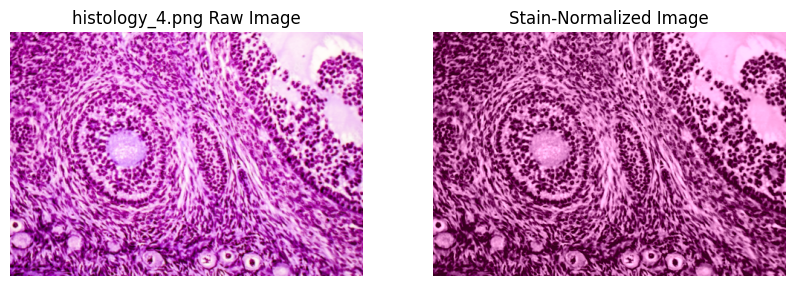

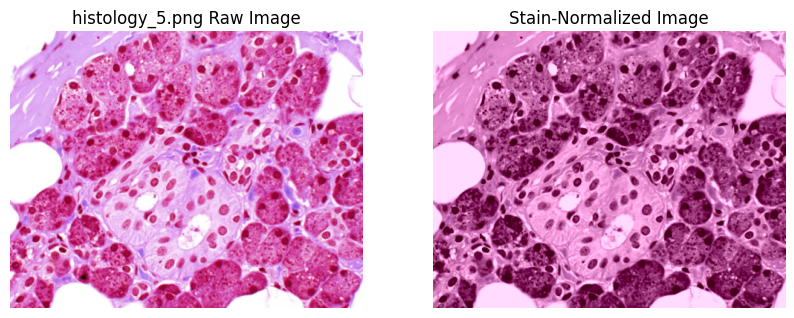

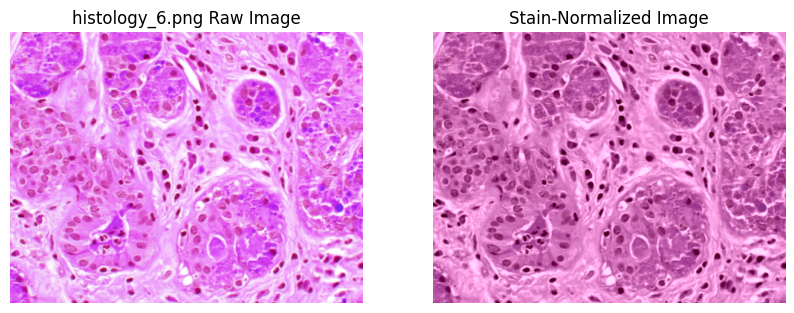

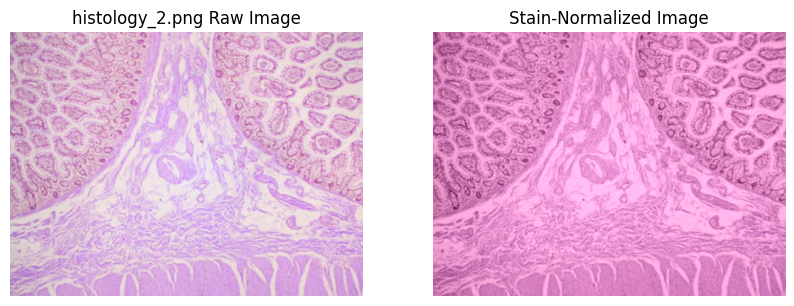

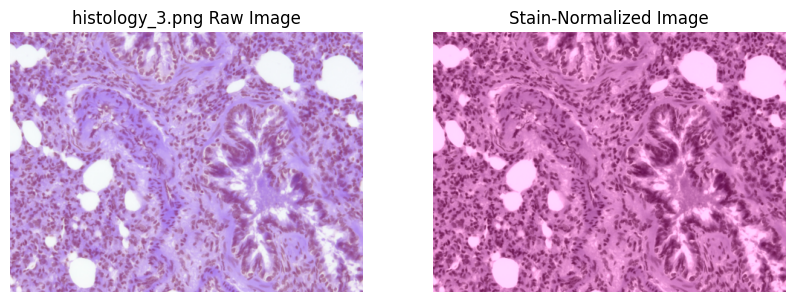

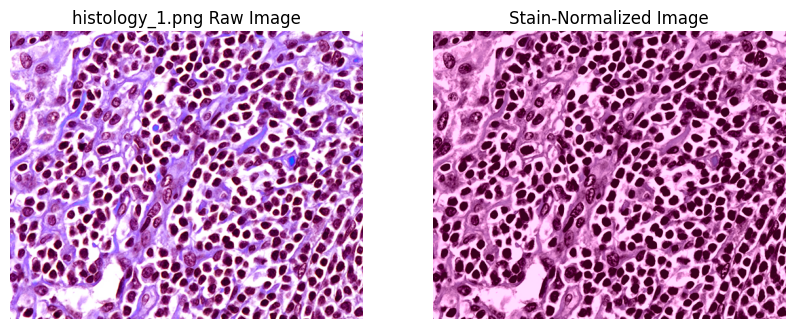

In [121]:
for img in (input_image_list):
    input_img_raw = cv2.imread(input_dir+img)
    input_img_LAB = cv2.cvtColor(input_img_raw,cv2.COLOR_BGR2LAB)
    
    
    img_mean, img_std = get_mean_and_std(input_img)
    
    
    height, width, channel = input_img_LAB.shape
    for i in range(0,height): # The first loop for i in range(0, height): iterates over each row of pixels (from top to bottom).
        for j in range(0,width): # The second loop for j in range(0, width): iterates over each column of pixels (from left to right) within a row.
            for k in range(0,channel): # The third loop for k in range(0, channel): iterates over each color channel of a pixel.
            	x = input_img_LAB[i,j,k] # Gets the value of the current pixel's color channel.
            	x = ((x-img_mean[k])*(template_std[k]/img_std[k]))+template_mean[k] # Standard score normalization (Z-score normalization) on the pixel value x
            	x = round(x) 
            	# boundary check
            	x = 0 if x<0 else x
            	x = 255 if x>255 else x
            	input_img_LAB[i,j,k] = x
            
    color_corrected_image= cv2.cvtColor(input_img_LAB,cv2.COLOR_LAB2BGR)
    cv2.imwrite(output_dir+"modified_"+img, color_corrected_image)

    # Create a figure to hold the subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the first image in the first subplot
    ax1.imshow(input_img_raw)
    ax1.set_title(str(img) + " Raw Image")
    ax1.axis('off')  # Hide the axis

    # Display the second image in the second subplot
    ax2.imshow(color_corrected_image)
    ax2.set_title('Stain-Normalized Image')
    ax2.axis('off')  # Hide the axis
    
    # Show the plot
    plt.show()

# For Image Augmentation Alone
If we just apply stain augmentation, we will introduce a bunch of random colors. We want to stay in a certain space.

In [127]:
import PIL.Image as Image
import os
from torchvision import transforms as transforms
#import tensorflow as tf


In [128]:
input_dir = '../data/histology_raw/'
input_image_list = os.listdir(input_dir)

#output_dir = "output_images/"
output_dir = '../data/histology_color_augmented/'

In [ ]:
dir_path = 'data/original/'
img_list = os.listdir(dir_path)

save_dir_path = "data/stain_augmentation"
if not os.path.exists(save_dir_path):
    os.mkdir(save_dir_path)

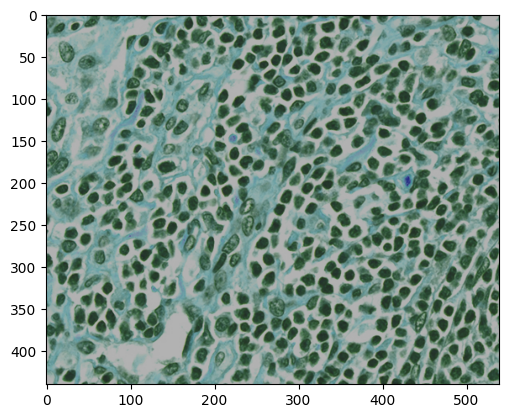

In [138]:
#ColorJitter randomly changes the brightness, contrast, saturation and hue of an image.
    
for img_path in input_image_list:
    full_img_path = input_dir+img_path
    image = transforms.ColorJitter(brightness=0.35, contrast=0.5, saturation=0.5, hue=0.5)(Image.open(full_img_path))
    save_img_path = output_dir + "/{}".format(img_path.split("/")[-1])
    image.save(save_img_path)


In [142]:
full_img_path

'../data/histology_raw/histology_1.png'